In [29]:
import numpy as np
import pandas as pd
import matplotlib as mplb
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
import datetime

In [31]:
data ={
  "expenses": [
    {
      "id": 4,
      "user_id": 1,
      "title": "новый заголовок",
      "description": "string",
      "value": 2147483647,
      "category": "rent",
      "created_at": "2025-08-11T07:45:13.356675Z",
      "updated_at": "2025-08-11T07:51:20.372128Z"
    },
    {
      "id": 5,
      "user_id": 1,
      "title": "string",
      "description": "string",
      "value": 2147483647,
      "category": "rent",
      "created_at": "2025-08-11T07:45:16.245657Z",
      "updated_at": "2025-08-11T07:45:16.245709Z"
    },
    {
      "id": 6,
      "user_id": 1,
      "title": "string",
      "description": "string",
      "value": 2147483647,
      "category": "rent",
      "created_at": "2025-08-11T07:45:18.249594Z",
      "updated_at": "2025-08-11T07:45:18.249619Z"
    },
    {
      "id": 7,
      "user_id": 1,
      "title": "string",
      "description": "string",
      "value": 2147483647,
      "category": "rent",
      "created_at": "2025-08-11T07:45:20.492678Z",
      "updated_at": "2025-08-11T07:45:20.492723Z"
    },
    {
      "id": 8,
      "user_id": 1,
      "title": "string",
      "description": "string",
      "value": 2147483647,
      "category": "rent",
      "created_at": "2025-08-11T07:45:22.412304Z",
      "updated_at": "2025-08-11T07:45:22.412348Z"
    },
    {
      "id": 9,
      "user_id": 1,
      "title": "string",
      "description": "string",
      "value": 2147483647,
      "category": "rent",
      "created_at": "2025-08-11T07:46:03.603940Z",
      "updated_at": "2025-08-11T07:46:03.603958Z"
    },
    {
      "id": 10,
      "user_id": 1,
      "title": "string",
      "description": "string",
      "value": 2147483647,
      "category": "rent",
      "created_at": "2025-08-11T07:51:53.328429Z",
      "updated_at": "2025-08-11T07:51:53.328474Z"
    }
  ],
  "incomes": [
    {
      "id": 2,
      "user_id": 1,
      "title": "string",
      "description": "string",
      "value": 2147483647,
      "category": "other",
      "created_at": "2025-08-11T07:54:45.062138Z",
      "updated_at": "2025-08-11T07:54:45.062179Z"
    },
    {
      "id": 3,
      "user_id": 1,
      "title": "string",
      "description": "string",
      "value": 2147483647,
      "category": "other",
      "created_at": "2025-08-11T07:54:47.362075Z",
      "updated_at": "2025-08-11T07:54:47.362115Z"
    }
  ]
}

In [32]:
expenses = data["expenses"]
incomes = data["incomes"]

In [33]:
expenses_df = pd.DataFrame(expenses)
incomes_df = pd.DataFrame(incomes)

expenses_df["created_at"] = pd.to_datetime(expenses_df["created_at"]).dt.tz_localize(None)
incomes_df["created_at"] = pd.to_datetime(incomes_df["created_at"]).dt.tz_localize(None)

expenses_df["updated_at"] = pd.to_datetime(expenses_df["updated_at"]).dt.tz_localize(None)
incomes_df["updated_at"] = pd.to_datetime(incomes_df["updated_at"]).dt.tz_localize(None)

In [34]:
expenses_df.head()

,id,user_id,title,description,value,category,created_at,updated_at
0,4,1,новый заголовок,string,2147483647,rent,2025-08-11 07:45:13.356675,2025-08-11 07:51:20.372128
1,5,1,string,string,2147483647,rent,2025-08-11 07:45:16.245657,2025-08-11 07:45:16.245709
2,6,1,string,string,2147483647,rent,2025-08-11 07:45:18.249594,2025-08-11 07:45:18.249619
3,7,1,string,string,2147483647,rent,2025-08-11 07:45:20.492678,2025-08-11 07:45:20.492723
4,8,1,string,string,2147483647,rent,2025-08-11 07:45:22.412304,2025-08-11 07:45:22.412348


In [35]:
incomes_df.head()

,id,user_id,title,description,value,category,created_at,updated_at
0,2,1,string,string,2147483647,other,2025-08-11 07:54:45.062138,2025-08-11 07:54:45.062179
1,3,1,string,string,2147483647,other,2025-08-11 07:54:47.362075,2025-08-11 07:54:47.362115


In [36]:
today = pd.Timestamp.now()
one_year_ago = today - pd.DateOffset(years=1)
one_month_ago = today - pd.DateOffset(months=1)


last_year_expenses = expenses_df[expenses_df.created_at > one_year_ago]
last_year_incomes = incomes_df[incomes_df.created_at > one_year_ago]
last_month_expenses = expenses_df[expenses_df.created_at > one_month_ago]
last_month_incomes = incomes_df[incomes_df.created_at > one_month_ago]
all_incomes = incomes_df
all_expenses = expenses_df


total_month_incomes = last_month_incomes["value"].sum()
total_month_expenses = last_month_expenses["value"].sum()
total_month_profit = total_month_incomes - total_month_expenses

total_year_incomes= last_year_incomes["value"].sum()
total_year_expenses = last_year_expenses["value"].sum()
total_year_profit = total_year_incomes - total_year_expenses

total_incomes = incomes_df["value"].sum()
total_expenses = expenses_df["value"].sum()
total_profit = total_incomes - total_expenses

In [37]:
incomes_category_groupped_year = last_year_incomes.groupby("category").agg({"value":"sum"}).reset_index()
expenses_category_groupped_year = last_year_expenses.groupby("category").agg({"value":"sum"}).reset_index()


incomes_category_groupped_month = last_month_incomes.groupby("category").agg({"value":"sum"}).reset_index()
expenses_category_groupped_month = last_month_expenses.groupby("category").agg({"value":"sum"}).reset_index()


incomes_category_groupped_total = incomes_df.groupby("category").agg({"value":"sum"}).reset_index()
expenses_category_groupped_total = expenses_df.groupby("category").agg({"value":"sum"}).reset_index()

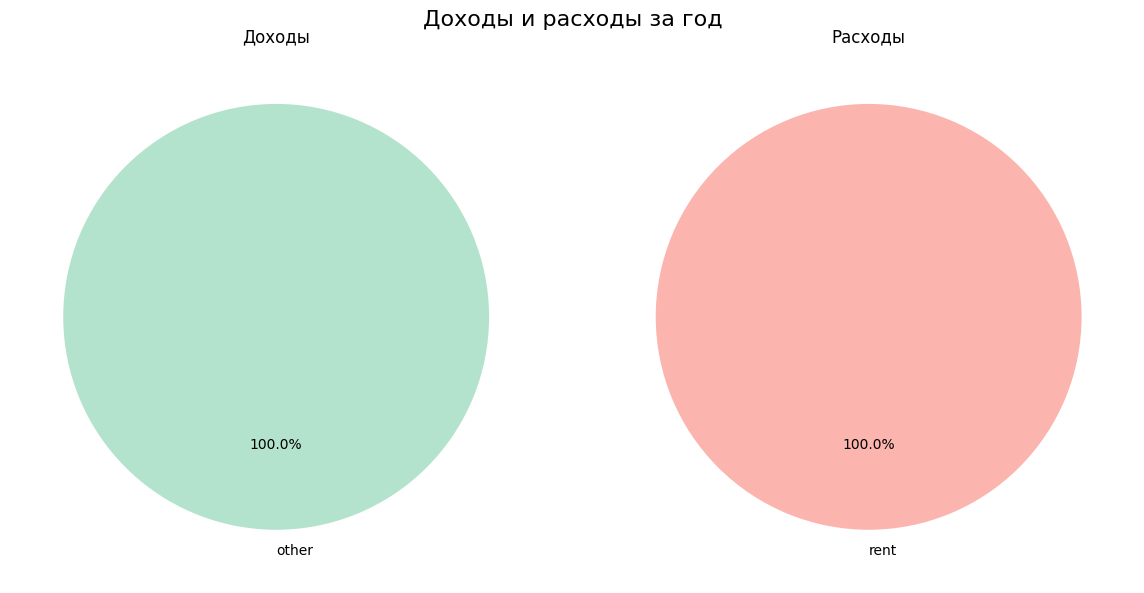

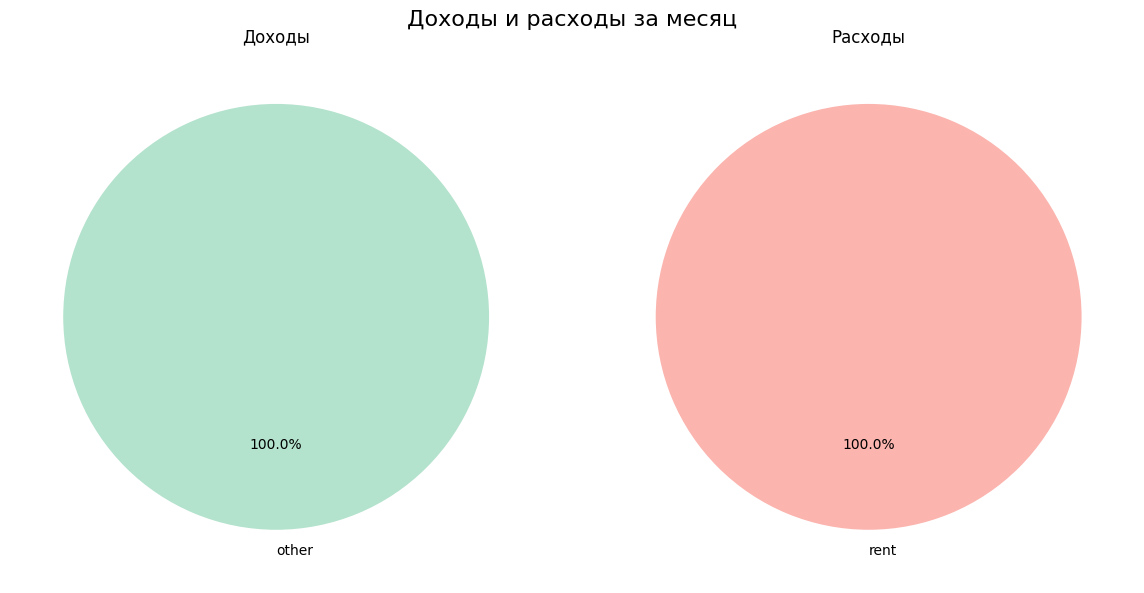

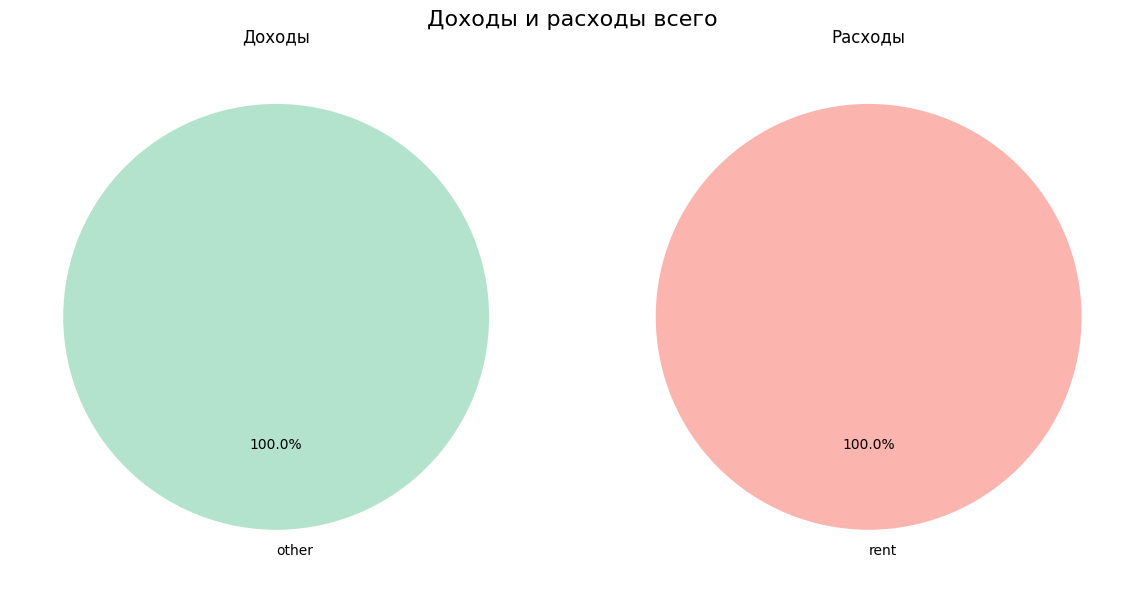

In [38]:
def plot_income_expense_pie(incomes_df, expenses_df, title):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    incomes_df.set_index("category")["value"].plot(
        kind="pie",
        autopct="%1.1f%%",
        startangle=90,
        colormap="Pastel2",
        ylabel="",
        ax=axes[0],
        title="Доходы"
    )

    expenses_df.set_index("category")["value"].plot(
        kind="pie",
        autopct="%1.1f%%",
        startangle=90,
        colormap="Pastel1",
        ylabel="",
        ax=axes[1],
        title="Расходы"
    )

    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()

# 1. Год
plot_income_expense_pie(incomes_category_groupped_year, expenses_category_groupped_year, "Доходы и расходы за год")

# 2. Месяц
plot_income_expense_pie(incomes_category_groupped_month, expenses_category_groupped_month, "Доходы и расходы за месяц")

# 3. Всего
plot_income_expense_pie(incomes_category_groupped_total, expenses_category_groupped_total, "Доходы и расходы всего")

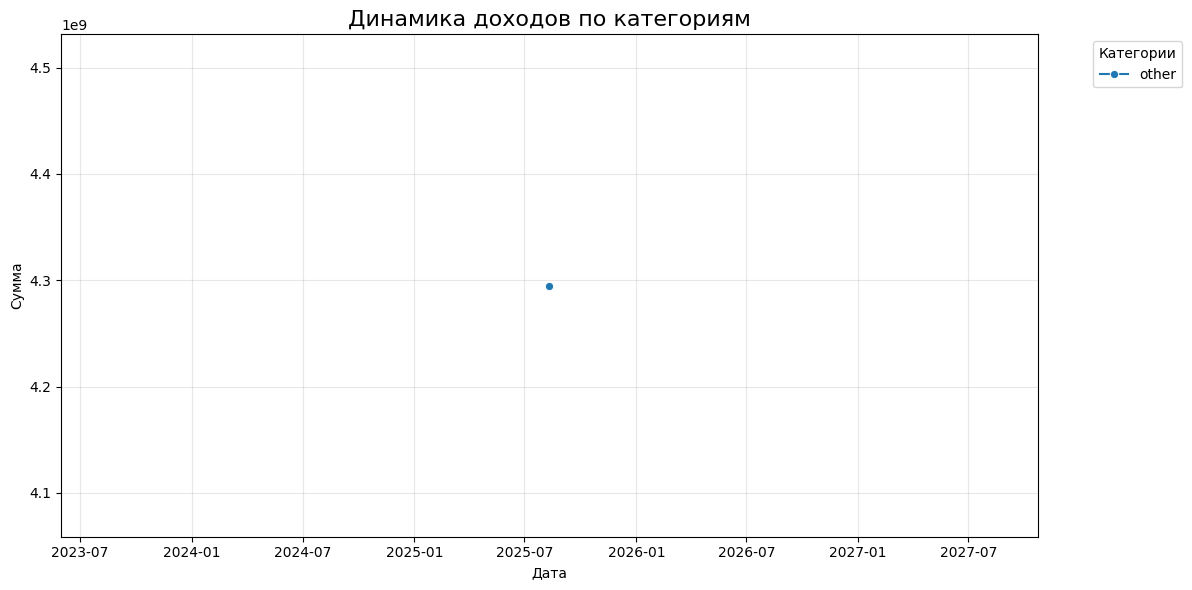

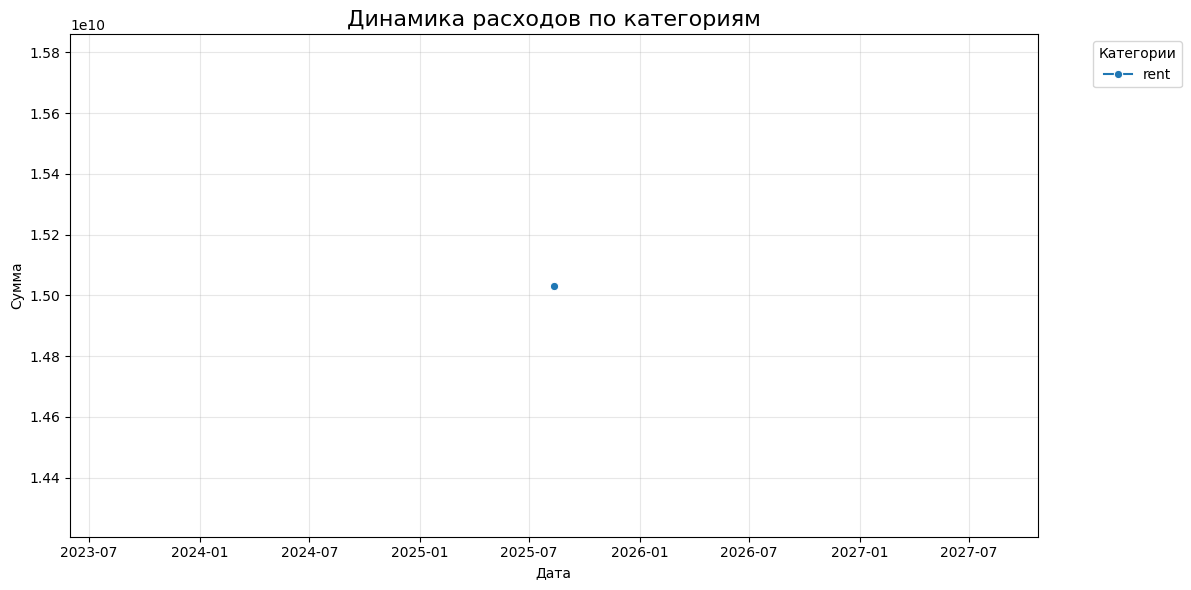

In [40]:

def plot_trends_seaborn(df, title):
    df_grouped = df.groupby([pd.Grouper(key="created_at", freq="D"), "category"])["value"].sum().reset_index()

    plt.figure(figsize=(12, 6))
    sns.lineplot(
        data=df_grouped,
        x="created_at",
        y="value",
        hue="category",
        marker="o"
    )

    plt.title(title, fontsize=16)
    plt.ylabel("Сумма")
    plt.xlabel("Дата")
    plt.grid(True, alpha=0.3)
    plt.legend(title="Категории", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Доходы
plot_trends_seaborn(incomes_df, "Динамика доходов по категориям")

# Расходы
plot_trends_seaborn(expenses_df, "Динамика расходов по категориям")